# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [5]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

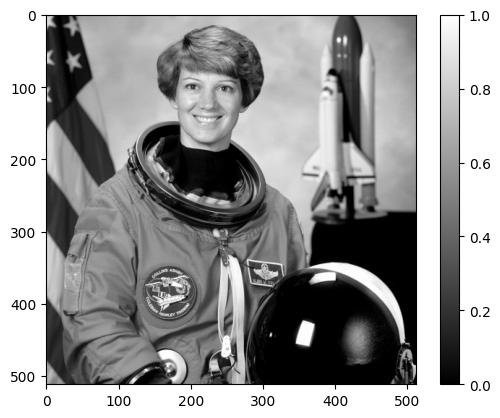

In [7]:
img_in = plt.imread('data/astronaut.png')
plt.imshow(img_in, 'gray')
plt.colorbar()


**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [25]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        i, j = p
        if i < n or j < n or i >= img_in.shape[0] - n or j >= img_in.shape[1] - n:
            continue 
        neighborhood_sum = 0
        count = 0
        for q in numpy.ndindex(size, size):
            di = q[0] - n
            dj = q[1] - n
            neighbor_i = p[0] + di
            neighbor_j = p[1] + dj
            neighborhood_sum += img_in[neighbor_i, neighbor_j]
            count += 1
        
        result[p] = neighborhood_sum / count
        
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

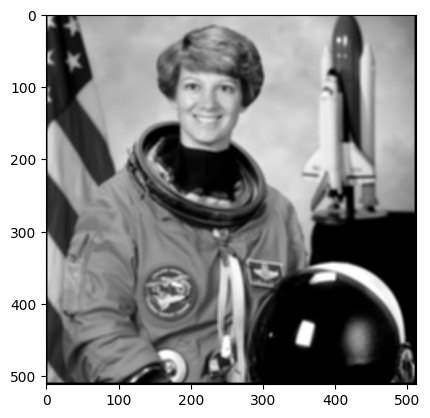

In [26]:
filtered_img = meanfilter(img_in, 5)
plt.imshow(filtered_img, 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

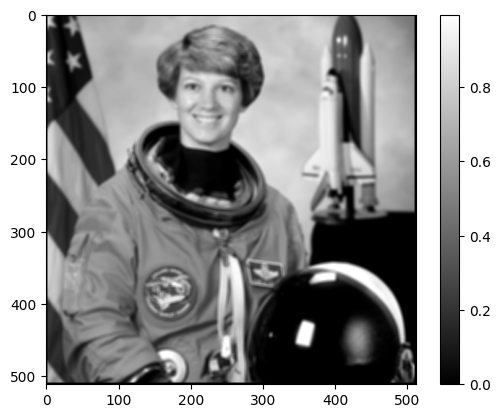

In [27]:
img_correct = plt.imread('data/astronaut_meanfilter5.png')
plt.imshow(img_correct, 'gray')
plt.colorbar()
assert numpy.allclose(filtered_img, img_correct, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [28]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        i, j = p
        if i < n or j < n or i >= img_in.shape[0] - n or j >= img_in.shape[1] - n:
            continue 
        neighborhood_list = []
        for q in numpy.ndindex(size, size):
            di = q[0] - n
            dj = q[1] - n
            neighbor_i = p[0] + di
            neighbor_j = p[1] + dj
            neighborhood_list.append(img_in[neighbor_i, neighbor_j])
           
        
        result[p] = numpy.median(neighborhood_list)
        
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

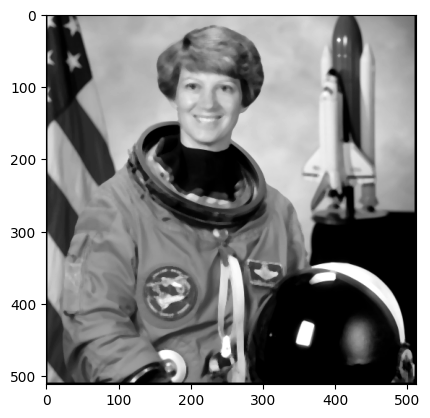

In [29]:
filteredmed_img = medianfilter(img_in, 5)
plt.imshow(filteredmed_img, 'gray')

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

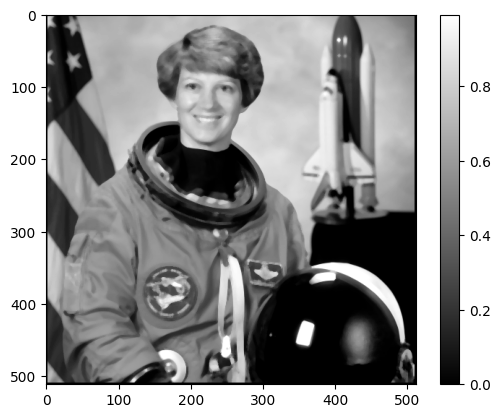

In [30]:
img_correctmed = plt.imread('data/astronaut_medianfilter5.png')
plt.imshow(img_correctmed, 'gray')
plt.colorbar()
assert numpy.allclose(filteredmed_img, img_correctmed, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [31]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

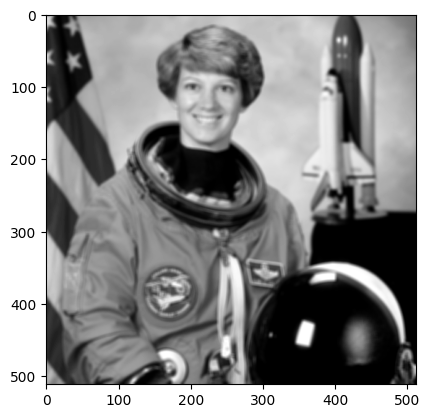

In [32]:
filtermean=scipy.ndimage.uniform_filter(img_in, 5)
plt.imshow(filtermean, 'gray')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

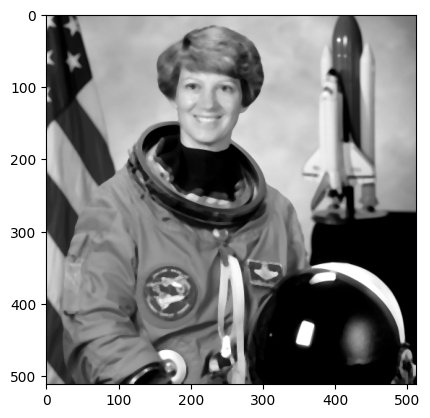

In [34]:
filtermedian=scipy.ndimage.median_filter(img_in, 5)
plt.imshow(filtermedian, 'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

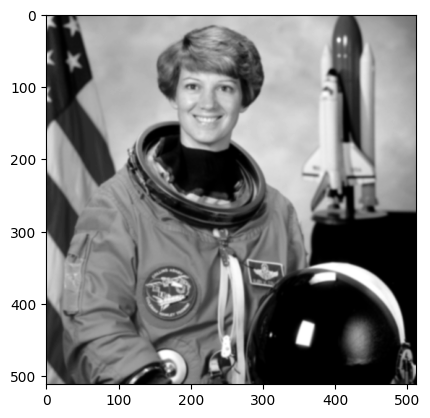

In [35]:
filtergauss=scipy.ndimage.gaussian_filter(img_in, 1)
plt.imshow(filtergauss, 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

In [ ]:
assert numpy.allclose (filtermedian, filteredmed_img,atol=1/255)
assert numpy.allclose (filtermean, filtered_img,atol=1/255)

AssertionError: 

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: